In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sbc import SBC, rmse_mean, rmse_averaged
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.figsize"] = "20, 10"

In [3]:
num_reps = 10000
data = dict(J=8, K=2, sigma = [15, 10, 16, 11,  9, 11, 10, 18])
sbc = SBC("../code/gen_8schools.stan", "../code/8schools_centered.stan",

             dict(chains=1, iter=1100, warmup=1000), stats=[rmse_mean, rmse_averaged])
reps = sbc.run(data, num_reps)
reps.to_csv(str(sbc) + ".csv")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0f82723c5c43ac8140f6c1b95a308459 NOW.


Using cached StanModel
Using  24  cores.


/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issub

run took 252.21365880966187s


In [4]:
reps.head()

,mu_n_eff,mu_order_stat,mu_prior,mu_rhat,mu_rmse_averaged,mu_rmse_mean,tau_n_eff,tau_order_stat,tau_prior,tau_rhat,tau_rmse_averaged,tau_rmse_mean,theta_n_eff,theta_order_stat,theta_prior,theta_rhat,theta_rmse_averaged,theta_rmse_mean
0,22.0,100,-4.929305,1.086515,7.907465,7.373436,11.0,74,2.243735,1.190259,3.302723,2.116431,"[22.0, 21.0, 55.0, 47.0, 52.0, 17.0, 75.0, 65.0]","[91, 69, 96, 94, 97, 79, 87, 96]","[-6.016123707682268, -1.8805191802782897, -4.1...","[1.087930805108158, 1.129267479969085, 0.99234...",24.541178,"[8.697354304972805, 4.561749777568826, 6.84439..."
1,19.0,8,5.715224,1.023168,5.550454,4.656602,15.0,0,9.169282,0.992441,6.606256,6.393447,"[21.0, 27.0, 28.0, 23.0, 38.0, 40.0, 30.0, 31.0]","[83, 67, 84, 34, 0, 3, 0, 46]","[-5.007475845092317, -0.3081024040860152, -3.3...","[0.995409953307638, 1.0355761296788397, 1.0095...",20.550289,"[6.095121292751217, 1.3957478517449147, 4.4358..."
2,23.0,37,-0.646733,0.997319,3.849988,1.372225,5.0,16,6.001963,1.357093,3.238519,2.372864,"[60.0, 52.0, 48.0, 40.0, 68.0, 54.0, 26.0, 48.0]","[75, 2, 81, 11, 90, 9, 57, 13]","[-6.759835420026633, 8.510909298035367, -6.525...","[1.0410507891268463, 0.9909731408513559, 0.998...",22.405784,"[4.7665177919785995, 10.5042269260834, 4.53175..."
3,46.0,92,-5.637770,0.996341,5.465405,4.454571,35.0,61,5.104206,0.994233,2.578482,0.744665,"[85.0, 67.0, 92.0, 87.0, 96.0, 79.0, 57.0, 61.0]","[79, 79, 41, 46, 94, 47, 90, 66]","[-8.050461761736795, -3.703311299633374, -1.34...","[0.9933653132378608, 0.9929366438213028, 0.990...",22.085812,"[6.625477435192238, 2.2783269730888165, 0.0819..."
4,18.0,95,-7.084594,1.065091,6.912835,5.943820,22.0,13,6.424805,0.997642,3.020433,2.253544,"[49.0, 17.0, 41.0, 19.0, 53.0, 21.0, 30.0, 100.0]","[95, 94, 90, 95, 87, 60, 80, 70]","[-6.673213800241708, -11.276464391402932, -7.0...","[1.0132924012411308, 1.084987719455118, 1.0417...",22.727717,"[5.7379073443328155, 10.341157935494039, 6.116..."


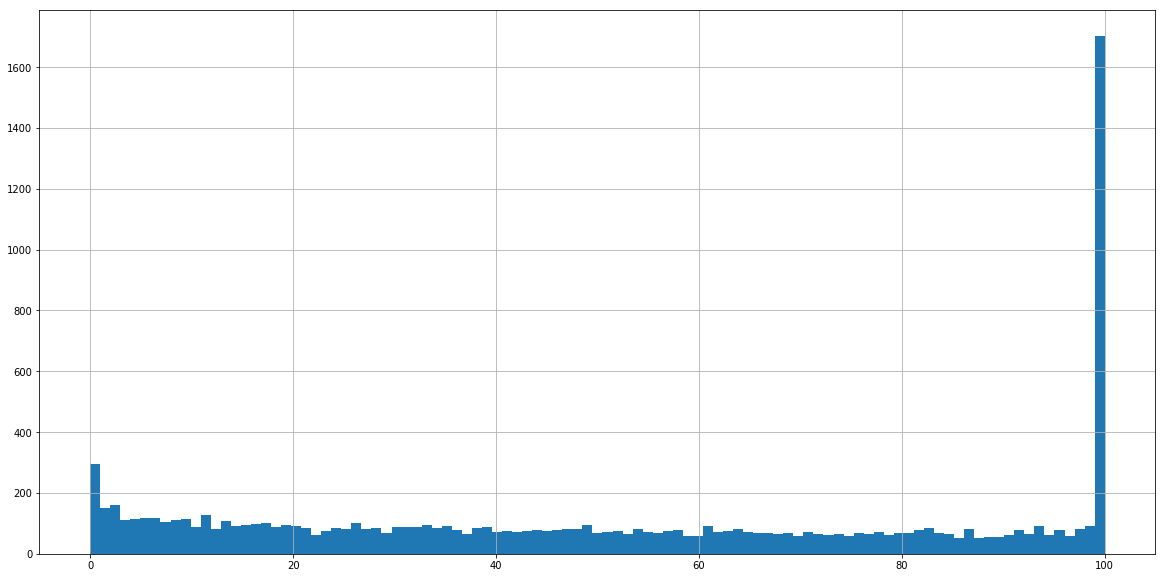

In [11]:
reps["tau_order_stat"].hist(bins=101)
plt.savefig("sbac_8schoolscp_tau_100.eps")

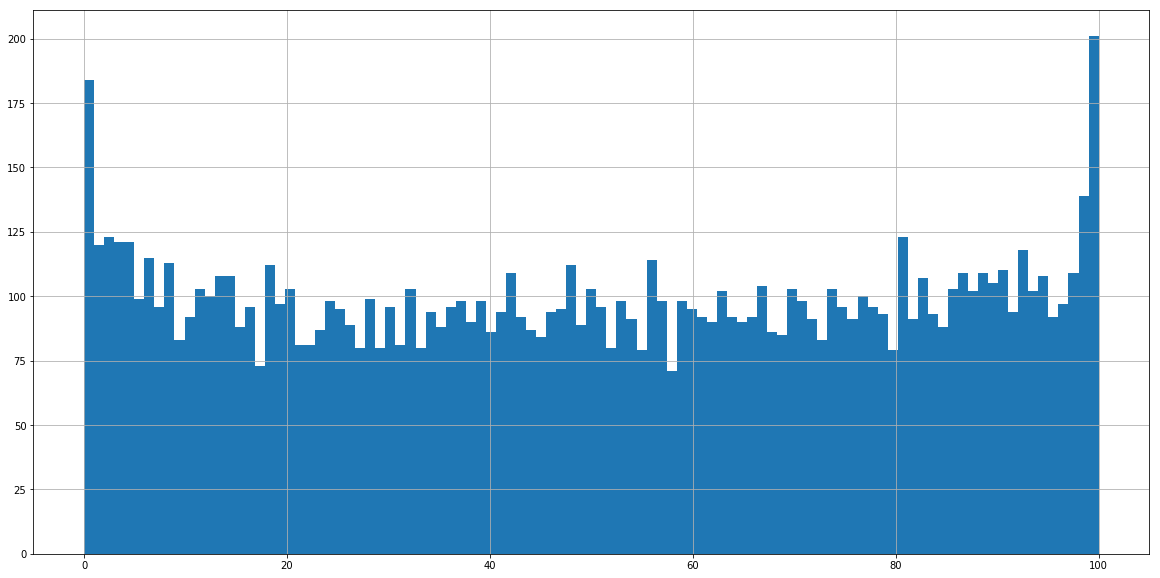

In [12]:
#reps["theta_order_stat"] = reps["theta_order_stat"].apply(lambda s: list(map(int, s[1:-1].split())))
pd.Series(([x[0] for x in reps["theta_order_stat"]])).hist(bins=101)
plt.savefig("sbac_8schoolscp_theta1_100.eps")